# **Exploring and Enhancing Non-Coding RNA Family Identification and Annotation Using Deep Learning on Primary Structure**


Author: <b> Emilio Vello. </b>

### Installation ###

git clone https://github.com/devantmarie/comp6841final.git

cd comp6841final

pip install biopython

pip install torch torchvision torchaudio


# **Abstract**



This study focuses on the design, implementation, and evaluation of five deep learning models for classifying 13 distinct classes of non-coding RNA (ncRNA) based on their primary sequence. The dataset, consisting of 11,320 sequences with lengths ranging from 100 to 130 nucleotides, was preprocessed and explored to understand the distribution of samples across classes. Notably, most classes had over 800 sequences, with the exception of IRES and scaRNA, which had slightly fewer samples.

The performance of five models—**Simple Linear**, **Simple MLP**, **Combined CNN**, **LSTM**, and **Transformer**—was assessed using three different sets of hyperparameters. Overfitting tests demonstrated that a simple linear model quickly overfitted with only 100 samples, emphasizing the need for more complex models and data.

Among the evaluated models, the **Combined CNN** achieved the best results, with the lowest validation loss (0.4188) and the highest global accuracy (0.9070), showing that local sequence motifs are crucial for ncRNA classification. The highest per-class accuracies were observed for ribosomal RNA classes (**5S_rRNA** and **5.8S_rRNA**), suggesting the importance of sequence conservation.

Comparisons to prior work showed that this approach outperformed the baseline model in the literature, achieving a nearly 9% higher accuracy. This study concludes that CNNs are well-suited for ncRNA classification, especially for conserved classes like rRNA, and that hyperparameter tuning plays a crucial role in improving model performance.



# **Introduction**

The classification of ncRNAs is essential in genetic research to infer their roles in various biological processes, understand their functions, and develop new treatments for illnesses such as cancer.

We can identify different classes of ncRNAs (Fiannaca et al., 2017; Zhang et al., 2021).

- **miRNA** (MicroRNA) – Small ncRNA molecules that regulate gene expression. They can act as oncogenes by suppressing tumor suppressors or as tumor suppressors by downregulating oncogenes.
- **snRNA** (Small Nuclear RNA) – Involved in the processing of pre-mRNA, mainly functioning within the spliceosome.
- **snoRNA** (Small Nucleolar RNA) – A subclass of snRNA that modifies rRNA and is linked to cancer progression, - such as snoRNA U50 in breast cancer.
- **lncRNA** (Long Non-Coding RNA) – ncRNA longer than 200 nucleotides with roles in gene regulation. Dysregulated - lncRNAs are associated with cancer and may serve as prognostic markers.
- **siRNA** (Silencing RNA) – Short double-stranded RNA molecules that mediate RNA interference (RNAi) to degrade target mRNA and suppress gene expression.
- **tRNA** (Transfer RNA) – Essential for protein synthesis, tRNA carries amino acids to the ribosome and ensures proper translation of mRNA into proteins.
- **Riboswitches** – Structured ncRNA domains that bind metabolites and regulate gene expression without protein involvement, indicating a key role in gene regulation.
- **IRES** (Internal Ribosome Entry Sites) – RNA elements that enable translation initiation independently of the 5' cap, playing a role in stress responses and viral translation.


The main goal of this project is to determine the class to which a given ncRNA belongs. Additionally, an attempt will be made to distinguish non-coding RNAs from the broader group of RNAs. However, for this project, some classes may be grouped together, or the dataset may be extended as needed.

This is a classification problem, and various techniques learned during the course will be applied to address it. The process will begin with a simple logistic regression model, followed by the implementation of more complex CNN and RNN models. In a practical and simplified manner, this task can be compared to identifying a cat or a dog in an image or recognizing a number—similar to how CNNs have been used—or to the exercise in Lab 5: “Does it contain ones?” (RNN). However, the complexity of the problem and the numerous possible combinations of these tools will be explored further including transformers.




## **Methodology**
The main goal of this project is to identify the **class to which a given non-coding RNA (ncRNA) belongs**.  

This is a **classification problem**, and my approach is to apply various techniques learned during the course to solve it. I start with **simpler models** such as **logistic regression**, a **single-layer perceptron**, and a **multilayer perceptron (MLP)**, and then progress to more complex architectures including **Convolutional Neural Networks (CNNs)**, **Recurrent Neural Networks (RNNs)**, and **Transformers**.

### Data Exploration

The first step was to explore the dataset by:
- Counting how many samples are available for each ncRNA class  
- Analyzing the average sequence length of the samples  

### Preprocessing

Before feeding sequences into the models, each RNA sequence is transformed into a **one-hot encoded matrix** with shape `(sequence_length, 4)`, corresponding to the four canonical RNA bases:  
- **A**: Adenine  
- **C**: Cytosine  
- **G**: Guanine  
- **U**: Uracil  

However, real-world RNA sequences often contain **ambiguous characters**, representing uncertainty or variability in base identity. These include:
- **N**: undetermined base  
- **R**: purine (A or G)  
- **Y**: pyrimidine (C or U)  
- **S**: G or C  
- **W**: A or U  
- **K**: G or U  
- **M**: A or C  
- **B**: C, G, or U  
- **D**: A, G, or U  
- **H**: A, C, or U  
- **V**: A, C, or G  
- **X**: unknown base  

In the case of these ambiguous characters, the corresponding rows in the one-hot encoded matrix are filled with **zeros**, indicating that none of the four standard bases can be confidently assigned.

### Data Augmentation and Length Normalization

To improve generalization and increase the amount of training data, **data augmentation** was applied using the **inverse complementary sequence**. The inverse complement is obtained by replacing each nucleotide with its complement (A with U, C with G, etc.) and reversing the order of the sequence. For example, the inverse complement of `AUGC` would be `GCAU`.

During preprocessing, a probability was associated with choosing between the original and the inverse complement. In the experiments, this probability was set to **0.5**, ensuring a balanced and maximized augmentation.

Another preprocessing step addressed the variability in sequence lengths. Since RNA sequences can vary in length, a **maximum sequence length** was defined.  
- If a sequence was longer than this maximum, it was **truncated**.  
- If it was shorter, it was **padded** with characters representing 'N' (undetermined base), which after one-hot encoding correspond to **rows of zeros**.  

This ensured that all sequences had the same shape and could be batched efficiently for training.

### Development Methodology

The development methodology used for this project follows **object-oriented programming (OOP)** principles. This approach facilitates the addition of new functionality and promotes modular design, making it easy to extend existing classes and override specific methods when needed.

At the core of the implementation is a `Run` class, which encapsulates key methods for **training, validation, and testing**. Each model (e.g., Logistic Regression, MLP, CNN, LSTM, Transformer) is implemented as a **separate class**, which can be passed to the main `Run` class for execution.

The dataset is handled through a custom class that **extends PyTorch’s `Dataset` class**, enabling seamless integration with PyTorch's `DataLoader`. This custom dataset class includes several methods for **data transformation and exploration**, such as one-hot encoding, handling ambiguous characters, applying sequence padding/truncation, and implementing data augmentation techniques.

Each model class is implemented by **extending PyTorch’s `nn.Module`**, ensuring compatibility with standard PyTorch workflows and allowing for flexible architecture design.

An overfitting test was performed using the logistic regression model to ensure the proper functioning of the overall development pipeline.





# **Experimental Setup**

For this project, I used a subset of Rfam, one of the most comprehensive repositories of manually curated RNA sequences. The specific selection was made by Fiannaca et al. (2017):  
https://github.com/IcarPA-TBlab/nrc/tree/master?tab=readme-ov-file

As shown in the image below, each RNA sequence starts with an identifier following the `<` symbol, then a space and the RNA class, followed by the nucleotide sequence itself. This format required preprocessing to extract and organize the data properly.

The dataset was originally divided into 6,320 ncRNA FASTA sequences for training and two validation sets with 2,600 and 2,400 sequences respectively. However, I chose not to follow this predefined distribution. Instead, I merged all the data into a single dataset comprising 11,320 samples, which I then randomly split into training, validation, and test sets (roughly 70%, 15%, and 15%).

To convert the FASTA files into a pandas DataFrame—used later in the custom PyTorch dataset class—I relied on the Biopython library. It's worth noting that due to installation issues on the Speed computing environment at Concordia, I was forced to perform the processing on CPU. Although this increased the runtime, the sequences are lightweight compared to image data, making it feasible to proceed without GPU support.

## **Training and Evaluation Metrics**

For training the models, the **Adam optimizer** was used along with **CrossEntropyLoss** as the loss function. In addition to tracking the loss, **accuracy** was used as a key performance metric—both globally and on a per-class basis.

For each epoch, the following were computed:
- Training loss
- Validation loss
- Global accuracy
- Per-class accuracy

This approach made it possible to assess how well each model generalized to unseen data at every training stage (validation group). The same metrics were also computed on the **test set** to evaluate final performance.

To aid interpretation, each training session included a **plot of training and validation loss over epochs**, accompanied by a **bar plot of accuracy per class**.

Although there were 13 ncRNA classes in the dataset, an additional class labeled as **0** was included to handle any unknown or undefined classes. However, this extra class was not encountered during this experiment.

Finally, all debugging code was removed from the final version, and appropriate comments were added to ensure clarity and maintainability.

## Folder/Package Structure

| **Folder/Package** | **Description** |
|--------------------|-----------------|
| `root` | `Project_emilio_vello.ipynb`: Notebook to execute the entire pipeline. Thi is the root package folder. |
| `datasetsnc` | `modelclasses.py`: Customizes the dataset classes and methods. |
| `algorithm` | `runclass.py`: Contains the class responsible for performing the main training, evaluation, and testing functions. |
| `modelsnc` | `modelclasses.py`: Contains all the models used in the project, including functionality for saving checkpoints during training. |
| `datafiles` | Contains the three Rfam files used in this project, as well as two images included in the methodology section. |



In each run, the system printed the hyperparameters as well as the model structure. Below is an example. However, in the results section, all the hyperparameters and model structures are listed.


### Simple MLP  
************************************************  
**Model Hyperparameters and Configuration Settings**  
------------------------------------------------  

- **fastafile:** `datafiles/dataset_Rfam_6320_13classes.fasta`  
- **batch_size:** 128  
- **num_workers:** 1  
- **model:**  
  SimpleMLP(  
  &nbsp;&nbsp;&nbsp;&nbsp;(fc1): Linear(in_features=440, out_features=100, bias=True)  
  &nbsp;&nbsp;&nbsp;&nbsp;(relu): ReLU()  
  &nbsp;&nbsp;&nbsp;&nbsp;(fc2): Linear(in_features=100, out_features=14, bias=True)  
  )  
- **device:** cpu  
- **train_ratio:** 0.7  
- **val_ratio:** 0.15  
- **test_ratio:** 0.15  
- **lr:** 0.001  
- **num_epochs:** 100  
- **seq_length:** 110  
- **subset:** 0  
- **chkpoint:** True  
- **chkpath:** `chkpoints/rsm`  
- **random_rev_compl_transform_prob:** 0.5  
- **fastaFile2:** `datafiles/dataset_Rfam_validated_2400_12classes.fasta`  
- **fastaFile3:** `datafiles/dataset_Rfam_validated_2600_13classes.fasta`  




### Data File Example

The dataset is in FASTA format. Each entry includes an identifier line and the RNA sequence. The identifier line starts with a `<` symbol, followed by a space, the RNA class label, and then the sequence ID.

Below is an example of how a typical data entry looks:



![DataSet Example](datafiles/printscreendata.jpeg)

### The 13 ncRNA classes used in this project are as follows:

![DataSet Example](datafiles/Fiannaca_et_al_2017.png)

Fiannaca et al. 2017

## **Experimental Results**


In [1]:
#Library installation
!pip install biopython
!pip install torch torchvision torchaudio


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


<h2>Load Libraries</H2>

In [6]:
# Libraries load
import importlib
import datasetsnc.dataclasses 
import modelsnc.modelclasses
import algorithms.runclass
from datasetsnc.dataclasses import * 
from modelsnc.modelclasses import *
from algorithms.runclass import * 
importlib.reload(datasetsnc.dataclasses)
importlib.reload(modelsnc.modelclasses)
importlib.reload(algorithms.runclass) 



<module 'algorithms.runclass' from '/home/emilio/PycharmProjects/comp6841final/algorithms/runclass.py'>

In [7]:
# fasta file location
nc_file = "datafiles/dataset_Rfam_6320_13classes.fasta"
nc_file2 = "datafiles/dataset_Rfam_validated_2400_12classes.fasta"
nc_file3 = "datafiles/dataset_Rfam_validated_2600_13classes.fasta"

<h2>Data Exploration</h2>

In [8]:
# create a data class
nc_set = NcRnaDataset(nc_file,fastaFile2=nc_file2, fastaFile3=nc_file3)
print(f"Total sample len: {len(nc_set)}")


Total sample len: 11320


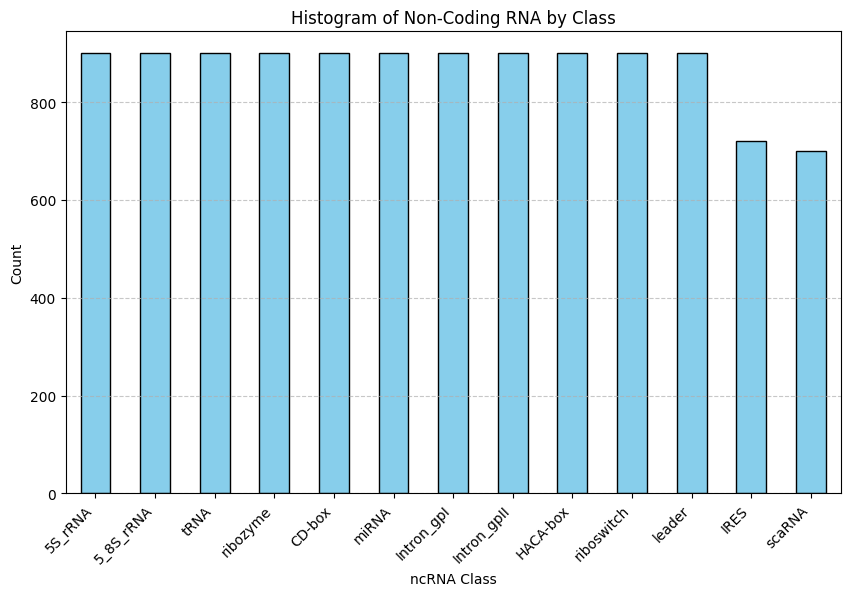

<module 'matplotlib.pyplot' from '/home/emilio/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [9]:
#plot distribution of non-coding RNA by class
nc_set.hist_nc_class()

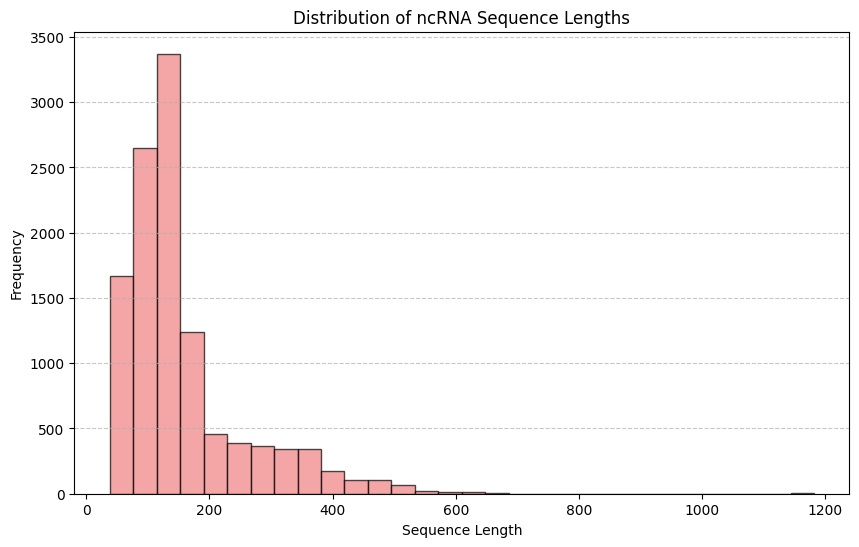

<module 'matplotlib.pyplot' from '/home/emilio/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [10]:
#plot distribution of non-coding RNA lenghts
nc_set.dist_nc_len()


<h2>Overfitting Test Using Only 100 Samples in a Linear (Logistic Regression) Model</h2>

In [11]:
#Overfitting test with a simple model and 100 samples.

seq_size = 120
simpleModel = SimpleLinear(input_size=seq_size*4)
rclass = ImplementDLEv(fastafile=nc_file, batch_size=2,num_workers=1, 
                 model = simpleModel, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=0.001, num_epochs = 3, seq_length = seq_size,
                 subset = 100,chkpoint=True, chkpath = "chkpoints/", random_rev_compl_transform_prob=0.9)

rclass.print_settings()
rclass.run_train()


************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 2
num_workers: 1
model: SimpleLinear(
  (fc): Linear(in_features=480, out_features=14, bias=True)
)
device: cpu
train_ratio: 0.7
val_ratio: 0.15
test_ratio: 0.15
lr: 0.001
num_epochs: 3
seq_length: 120
subset: 100
chkpoint: True
chkpath: chkpoints/
random_rev_compl_transform_prob: 0.9
fastaFile2: None
fastaFile3: None


Run Information
---------------
Total sample length: 100
Epoch 1/3, Loss: 1.0729, Avg Batch Time: 0.0019s
Validation Loss: 0.1258, Validation Accuracy: 1.0000
Validation Class Accuracy:  [0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Epoch 2/3, Loss: 0.0722, Avg Batch Time: 0.0019s
Validation Loss: 0.0356, Validation Accuracy: 1.0000
Validation Class Accuracy:  [0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Epoch 3/3, Loss: 0.0290, Avg Batch Time: 0.0015s
Validati

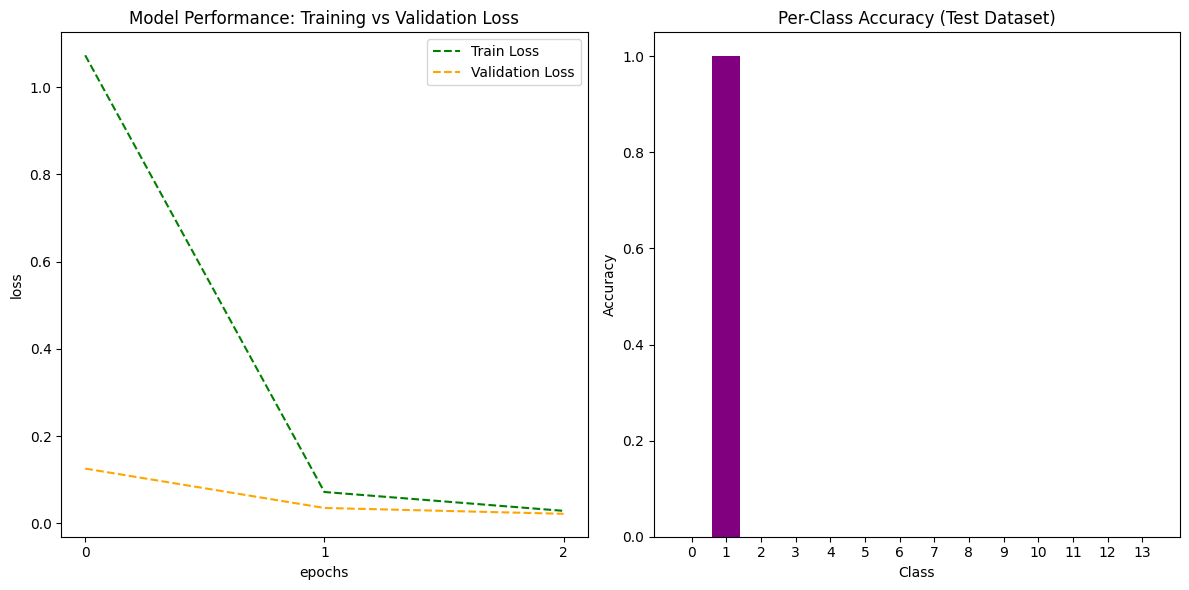

In [12]:
# Plot
rclass.perform_accuracy_gether()

<h2>Logistic Regression (SimpleLinear), Multilayer Perceptron (SimpleMLP), Complex Convolutional Neural Network (CombineCNN1),  Long Short-Term Memory (rnnLSTM) and Transformer  (Transformer) models</h2>


In [13]:
seq_size = 110
batch_size=128
num_epochs = 100
random_rev_compl_transform_prob = 0.5
lr=0.001

In [14]:
print("Simple Linear Model (Logistic Regression)")
sl = SimpleLinear(input_size=seq_size*4)
rsl = ImplementDLEv(fastafile=nc_file, batch_size=batch_size,num_workers=1, 
                 model = sl, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=lr, num_epochs = num_epochs, seq_length = seq_size,
                 subset = 0,chkpoint=True, chkpath = "chkpoints/rsl", random_rev_compl_transform_prob=random_rev_compl_transform_prob,
                 fastaFile2=nc_file2, fastaFile3=nc_file3)
                

rsl.print_settings()
rsl.run_train()

Simple Linear Model (Logistic Regression)
************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 128
num_workers: 1
model: SimpleLinear(
  (fc): Linear(in_features=440, out_features=14, bias=True)
)
device: cpu
train_ratio: 0.7
val_ratio: 0.15
test_ratio: 0.15
lr: 0.001
num_epochs: 100
seq_length: 110
subset: 0
chkpoint: True
chkpath: chkpoints/rsl
random_rev_compl_transform_prob: 0.5
fastaFile2: datafiles/dataset_Rfam_validated_2400_12classes.fasta
fastaFile3: datafiles/dataset_Rfam_validated_2600_13classes.fasta


Run Information
---------------
Total sample length: 11320
Epoch 1/100, Loss: 2.2845, Avg Batch Time: 0.0022s
Validation Loss: 1.9867, Validation Accuracy: 0.4882
Validation Class Accuracy:  [0, 0.798, 0.775, 0.928, 0.398, 0.42, 0.187, 0.5, 0.623, 0.54, 0.272, 0.361, 0.351, 0.05]
Epoch 2/100, Loss: 1.7971, Avg Batch T

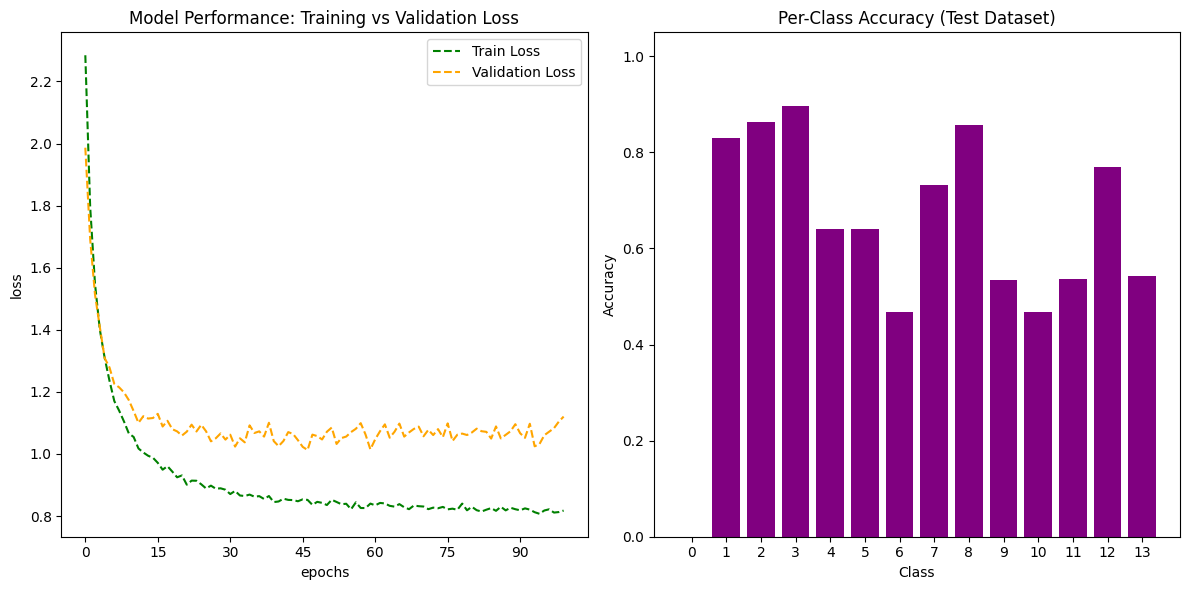

In [15]:
rsl.perform_accuracy_gether()

In [16]:
print("Simple MLP")
sm = SimpleMLP(input_size=seq_size*4)
rsm = ImplementDLEv(fastafile=nc_file, batch_size=batch_size,num_workers=1, 
                 model = sm, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=lr, num_epochs = num_epochs, seq_length = seq_size,
                 subset = 0,chkpoint=True, chkpath = "chkpoints/rsm", random_rev_compl_transform_prob=random_rev_compl_transform_prob,
                 fastaFile2=nc_file2, fastaFile3=nc_file3)
                

rsm.print_settings()
rsm.run_train()


Simple MLP
************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 128
num_workers: 1
model: SimpleMLP(
  (fc1): Linear(in_features=440, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=14, bias=True)
)
device: cpu
train_ratio: 0.7
val_ratio: 0.15
test_ratio: 0.15
lr: 0.001
num_epochs: 100
seq_length: 110
subset: 0
chkpoint: True
chkpath: chkpoints/rsm
random_rev_compl_transform_prob: 0.5
fastaFile2: datafiles/dataset_Rfam_validated_2400_12classes.fasta
fastaFile3: datafiles/dataset_Rfam_validated_2600_13classes.fasta


Run Information
---------------
Total sample length: 11320
Epoch 1/100, Loss: 2.1721, Avg Batch Time: 0.0047s
Validation Loss: 1.6720, Validation Accuracy: 0.4994
Validation Class Accuracy:  [0, 0.792, 0.797, 0.92, 0.347, 0.492, 0.056, 0.552, 0.599, 0.316, 0.282, 0.33, 0.7

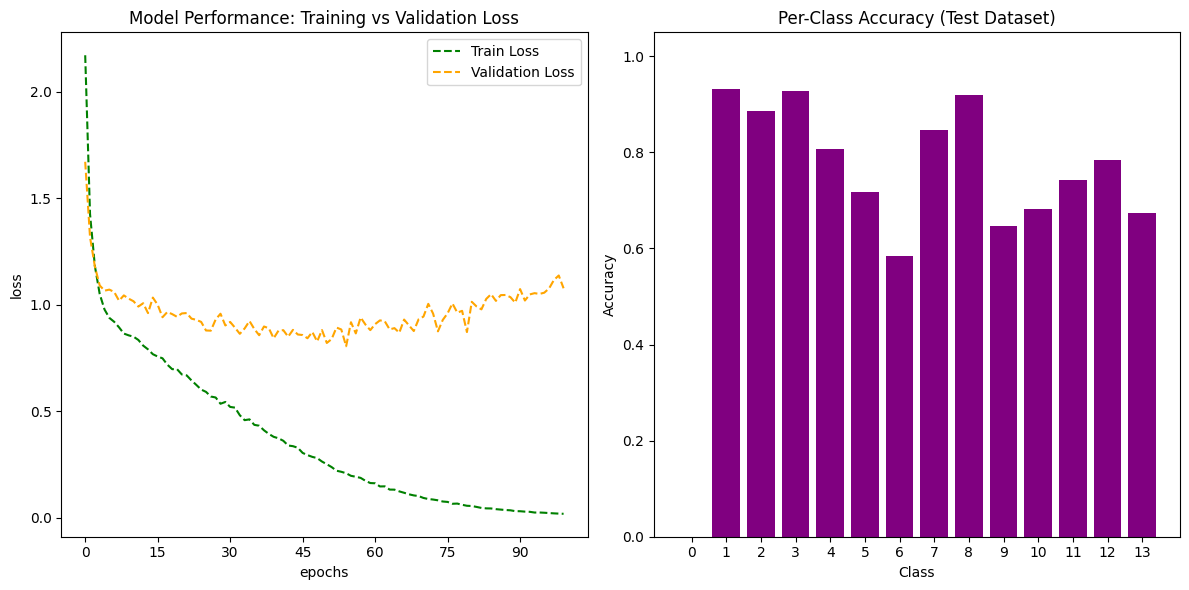

In [17]:
rsm.perform_accuracy_gether()

In [18]:
print("Combined CNN")
cCNN1 = CombineCNN1(input_size=seq_size)
rcCNN1=ImplementDLEv(fastafile=nc_file, batch_size=batch_size,num_workers=1, 
                 model = cCNN1, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=lr, num_epochs = num_epochs, seq_length = seq_size,
                 subset = 0,chkpoint=True, chkpath = "chkpoints/rccnn1", random_rev_compl_transform_prob=random_rev_compl_transform_prob,
                 fastaFile2=nc_file2, fastaFile3=nc_file3)

rcCNN1.print_settings()
rcCNN1.run_train()


Combined CNN
************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 128
num_workers: 1
model: CombineCNN1(
  (conv1): Conv2d(4, 64, kernel_size=(7, 1), stride=(1, 1), padding=(3, 0))
  (conv2): Conv2d(64, 128, kernel_size=(7, 1), stride=(1, 1), padding=(3, 0))
  (conv3): Conv2d(128, 256, kernel_size=(7, 1), stride=(1, 1), padding=(3, 0))
  (pool): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3328, out_features=512, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=14, bias=True)
  (relu): ReLU()
)
device: cpu
train_ratio: 0.7
val_ratio: 0.15
test_ratio: 0.15
lr: 0.001
num_epochs: 100
seq_length: 110
subset: 0
chkpoint: True
chkpath: chkpoints/rccnn1
random_rev_compl_transform_prob: 0.5
fastaFile2: datafiles/datase

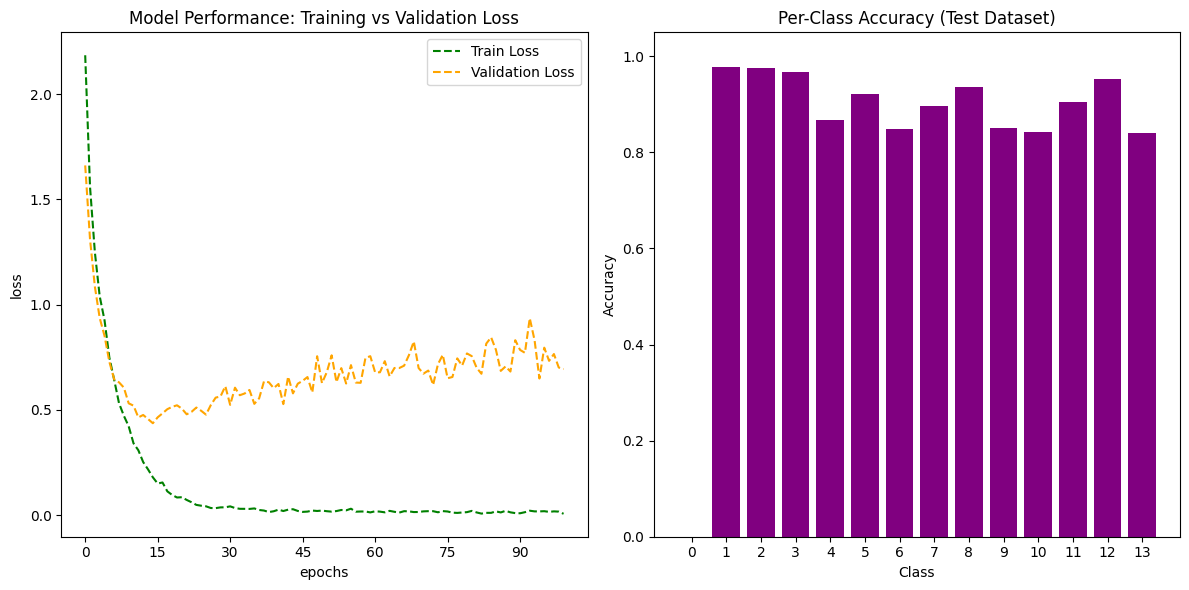

In [19]:
rcCNN1.perform_accuracy_gether()

In [20]:
print("LSTM")
lst = RnnLSTM(input_size=4)
rlst = ImplementDLEv(fastafile=nc_file, batch_size=batch_size,num_workers=1, 
                 model = lst, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=lr, num_epochs = num_epochs, seq_length = seq_size,
                 subset = 0,chkpoint=True, chkpath = "chkpoints/rlst", random_rev_compl_transform_prob=random_rev_compl_transform_prob,
                 fastaFile2=nc_file2, fastaFile3=nc_file3)

rlst.print_settings()
rlst.run_train()


LSTM
************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 128
num_workers: 1
model: RnnLSTM(
  (lstm): LSTM(4, 128, batch_first=True)
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=256, out_features=14, bias=True)
)
device: cpu
train_ratio: 0.7
val_ratio: 0.15
test_ratio: 0.15
lr: 0.001
num_epochs: 100
seq_length: 110
subset: 0
chkpoint: True
chkpath: chkpoints/rlst
random_rev_compl_transform_prob: 0.5
fastaFile2: datafiles/dataset_Rfam_validated_2400_12classes.fasta
fastaFile3: datafiles/dataset_Rfam_validated_2600_13classes.fasta


Run Information
---------------
Total sample length: 11320
Epoch 1/100, Loss: 2.5444, Avg Batch Time: 0.4231s
Validation Loss: 2.4261, Validation Accuracy: 0.1290
Validation Class Accuracy:  [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.704, 0.

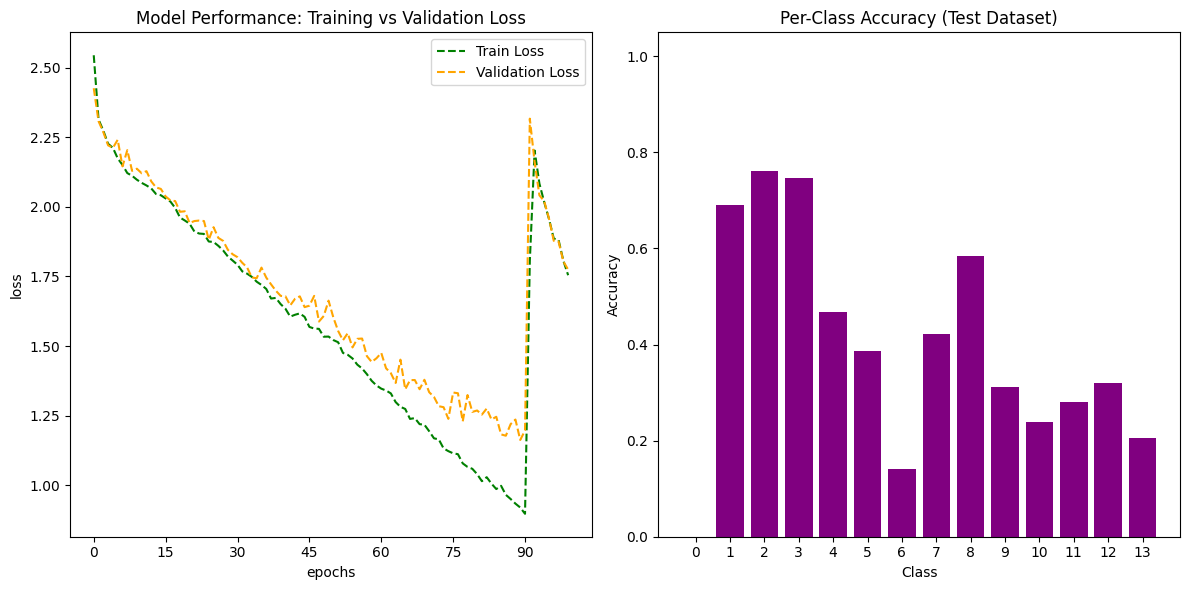

In [21]:
rlst.perform_accuracy_gether()

In [22]:
print("Transformer")
trf = Transformer(input_size=seq_size)
rtrf = ImplementDLEv(fastafile=nc_file, batch_size=batch_size,num_workers=1, 
                 model = trf, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=lr, num_epochs = num_epochs, seq_length = seq_size,
                 subset = 0,chkpoint=True, chkpath = "chkpoints/rtrf", random_rev_compl_transform_prob=random_rev_compl_transform_prob,
                 fastaFile2=nc_file2, fastaFile3=nc_file3)

rtrf.print_settings()
rtrf.run_train()

Transformer
************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 128
num_workers: 1
model: Transformer(
  (embedding): Linear(in_features=4, out_features=64, bias=True)
  (positional_encoding): PositionalEncoding()
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=Fals

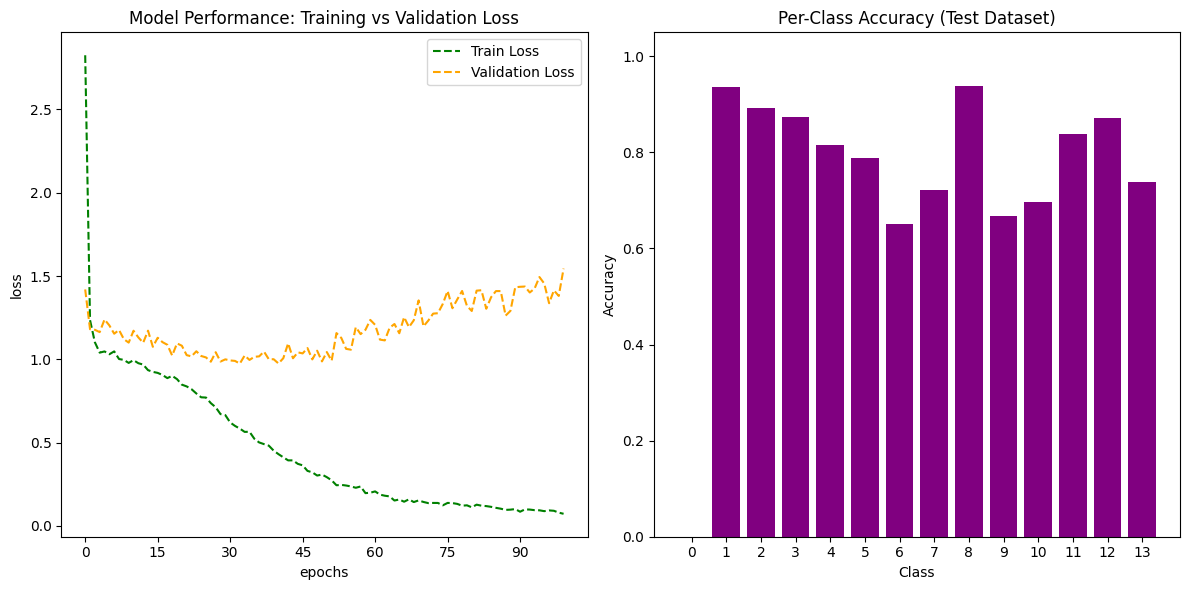

In [23]:
rtrf.perform_accuracy_gether()

<h3>Chg Hyperparameters 2</h3>

In [24]:
seq_size = 120
batch_size=256
num_epochs = 100
random_rev_compl_transform_prob = 0.5
lr=0.01

In [25]:
print("Simple Linear Model (Logistic Regression) 2")
sl2 = SimpleLinear(input_size=seq_size*4)
rsl2 = ImplementDLEv(fastafile=nc_file, batch_size=batch_size,num_workers=1, 
                 model = sl2, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=lr, num_epochs = num_epochs, seq_length = seq_size,
                 subset = 0,chkpoint=True, chkpath = "chkpoints/rsl", random_rev_compl_transform_prob=random_rev_compl_transform_prob,
                 fastaFile2=nc_file2, fastaFile3=nc_file3)
                

rsl2.print_settings()
rsl2.run_train()

Simple Linear Model (Logistic Regression) 2
************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 256
num_workers: 1
model: SimpleLinear(
  (fc): Linear(in_features=480, out_features=14, bias=True)
)
device: cpu
train_ratio: 0.7
val_ratio: 0.15
test_ratio: 0.15
lr: 0.01
num_epochs: 100
seq_length: 120
subset: 0
chkpoint: True
chkpath: chkpoints/rsl
random_rev_compl_transform_prob: 0.5
fastaFile2: datafiles/dataset_Rfam_validated_2400_12classes.fasta
fastaFile3: datafiles/dataset_Rfam_validated_2600_13classes.fasta


Run Information
---------------
Total sample length: 11320
Epoch 1/100, Loss: 1.6248, Avg Batch Time: 0.0035s
Validation Loss: 1.2104, Validation Accuracy: 0.6372
Validation Class Accuracy:  [0, 0.799, 0.863, 0.902, 0.56, 0.629, 0.439, 0.698, 0.712, 0.429, 0.561, 0.438, 0.621, 0.576]
Epoch 2/100, Loss: 1.0753, Avg Ba

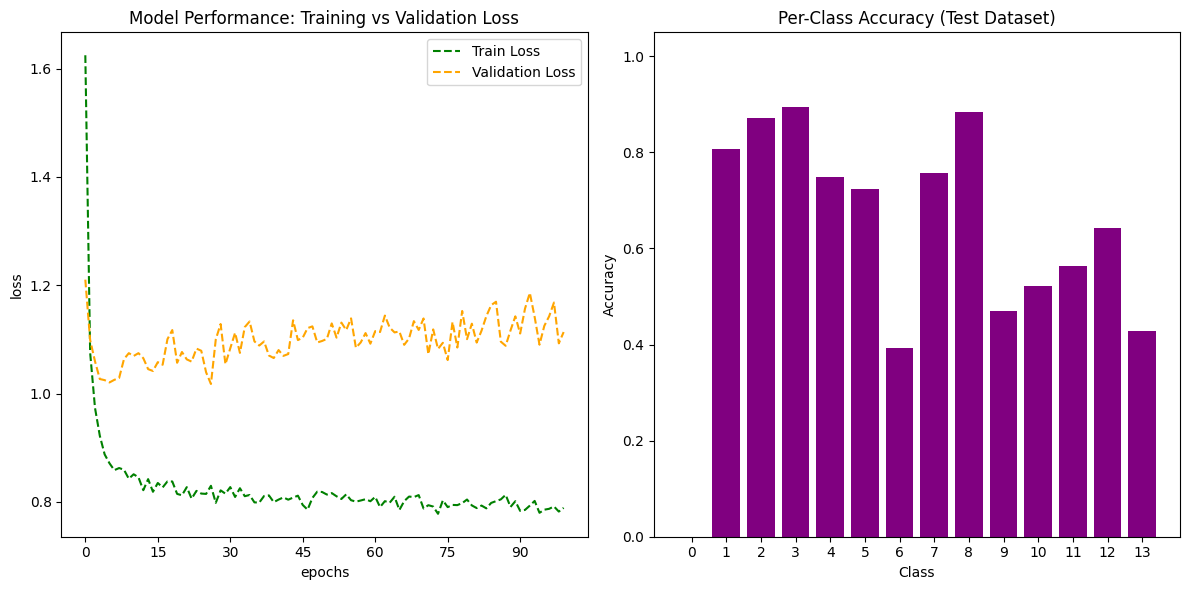

In [26]:
rsl2.perform_accuracy_gether()

In [27]:
print("Simple MLP 2")
sm2 = SimpleMLP(input_size=seq_size*4)
rsm2 = ImplementDLEv(fastafile=nc_file, batch_size=batch_size,num_workers=1, 
                 model = sm2, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=lr, num_epochs = num_epochs, seq_length = seq_size,
                 subset = 0,chkpoint=True, chkpath = "chkpoints/rsm", random_rev_compl_transform_prob=random_rev_compl_transform_prob,
                 fastaFile2=nc_file2, fastaFile3=nc_file3)
                

rsm2.print_settings()
rsm2.run_train()


Simple MLP 2
************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 256
num_workers: 1
model: SimpleMLP(
  (fc1): Linear(in_features=480, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=14, bias=True)
)
device: cpu
train_ratio: 0.7
val_ratio: 0.15
test_ratio: 0.15
lr: 0.01
num_epochs: 100
seq_length: 120
subset: 0
chkpoint: True
chkpath: chkpoints/rsm
random_rev_compl_transform_prob: 0.5
fastaFile2: datafiles/dataset_Rfam_validated_2400_12classes.fasta
fastaFile3: datafiles/dataset_Rfam_validated_2600_13classes.fasta


Run Information
---------------
Total sample length: 11320
Epoch 1/100, Loss: 1.5741, Avg Batch Time: 0.0076s
Validation Loss: 1.2469, Validation Accuracy: 0.6125
Validation Class Accuracy:  [0, 0.831, 0.797, 0.829, 0.696, 0.648, 0.45, 0.64, 0.728, 0.578, 0.265, 0.54, 0.5

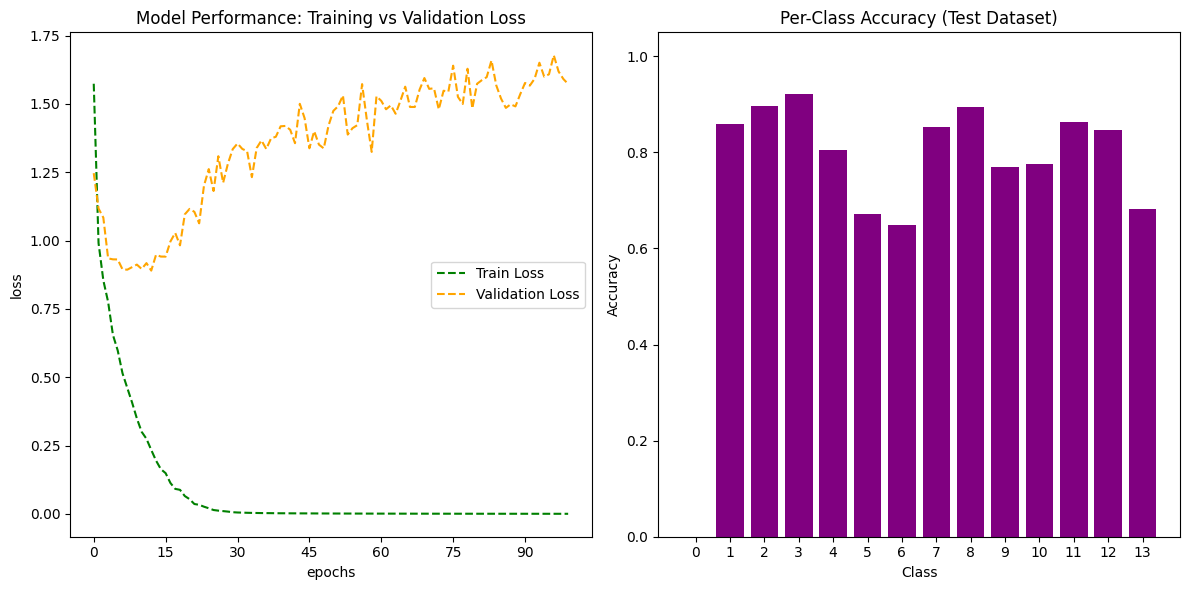

In [28]:
rsm2.perform_accuracy_gether()

In [29]:
print("Combined CNN 2")
cCNN12 = CombineCNN1(input_size=seq_size)
rcCNN12=ImplementDLEv(fastafile=nc_file, batch_size=batch_size,num_workers=1, 
                 model = cCNN12, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=lr, num_epochs = num_epochs, seq_length = seq_size,
                 subset = 0,chkpoint=True, chkpath = "chkpoints/rccnn1", random_rev_compl_transform_prob=random_rev_compl_transform_prob,
                 fastaFile2=nc_file2, fastaFile3=nc_file3)

rcCNN12.print_settings()
rcCNN12.run_train()


Combined CNN 2
************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 256
num_workers: 1
model: CombineCNN1(
  (conv1): Conv2d(4, 64, kernel_size=(7, 1), stride=(1, 1), padding=(3, 0))
  (conv2): Conv2d(64, 128, kernel_size=(7, 1), stride=(1, 1), padding=(3, 0))
  (conv3): Conv2d(128, 256, kernel_size=(7, 1), stride=(1, 1), padding=(3, 0))
  (pool): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3840, out_features=512, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=14, bias=True)
  (relu): ReLU()
)
device: cpu
train_ratio: 0.7
val_ratio: 0.15
test_ratio: 0.15
lr: 0.01
num_epochs: 100
seq_length: 120
subset: 0
chkpoint: True
chkpath: chkpoints/rccnn1
random_rev_compl_transform_prob: 0.5
fastaFile2: datafiles/datas

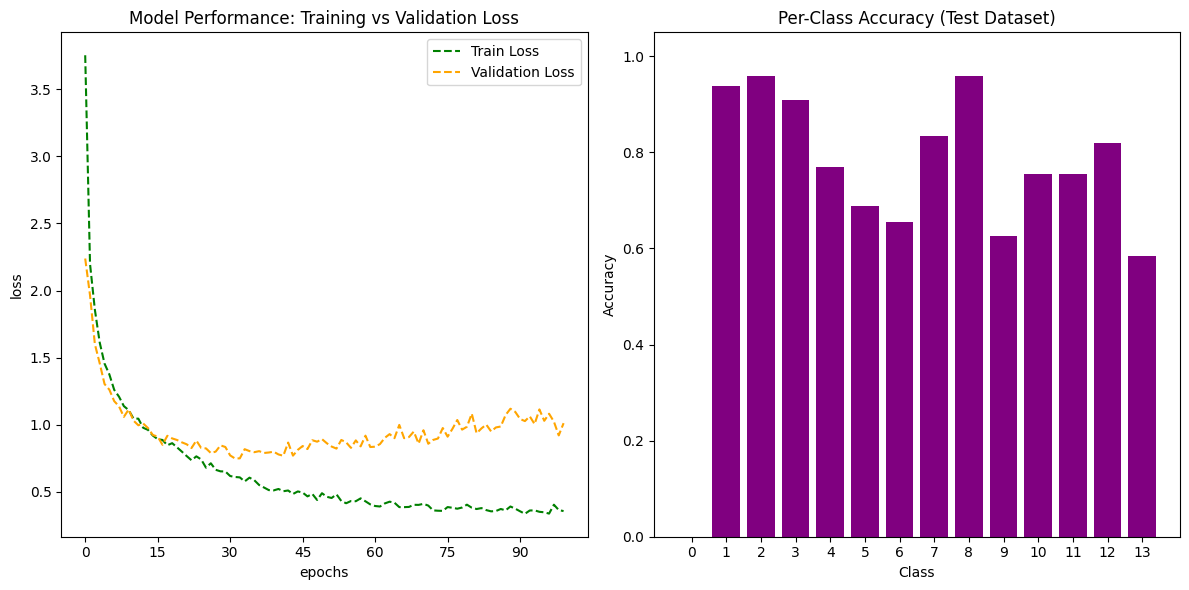

In [30]:
rcCNN12.perform_accuracy_gether()

In [31]:
print("LSTM 2")
lst2 = RnnLSTM(input_size=4)
rlst2 = ImplementDLEv(fastafile=nc_file, batch_size=batch_size,num_workers=1, 
                 model = lst2, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=lr, num_epochs = num_epochs, seq_length = seq_size,
                 subset = 0,chkpoint=True, chkpath = "chkpoints/rlst", random_rev_compl_transform_prob=random_rev_compl_transform_prob,
                 fastaFile2=nc_file2, fastaFile3=nc_file3)

rlst2.print_settings()
rlst2.run_train()


LSTM 2
************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 256
num_workers: 1
model: RnnLSTM(
  (lstm): LSTM(4, 128, batch_first=True)
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=256, out_features=14, bias=True)
)
device: cpu
train_ratio: 0.7
val_ratio: 0.15
test_ratio: 0.15
lr: 0.01
num_epochs: 100
seq_length: 120
subset: 0
chkpoint: True
chkpath: chkpoints/rlst
random_rev_compl_transform_prob: 0.5
fastaFile2: datafiles/dataset_Rfam_validated_2400_12classes.fasta
fastaFile3: datafiles/dataset_Rfam_validated_2600_13classes.fasta


Run Information
---------------
Total sample length: 11320
Epoch 1/100, Loss: 2.3815, Avg Batch Time: 0.9845s
Validation Loss: 2.2598, Validation Accuracy: 0.2167
Validation Class Accuracy:  [0, 0.476, 0.14, 0.681, 0.0, 0.0, 0.457, 0.0, 0

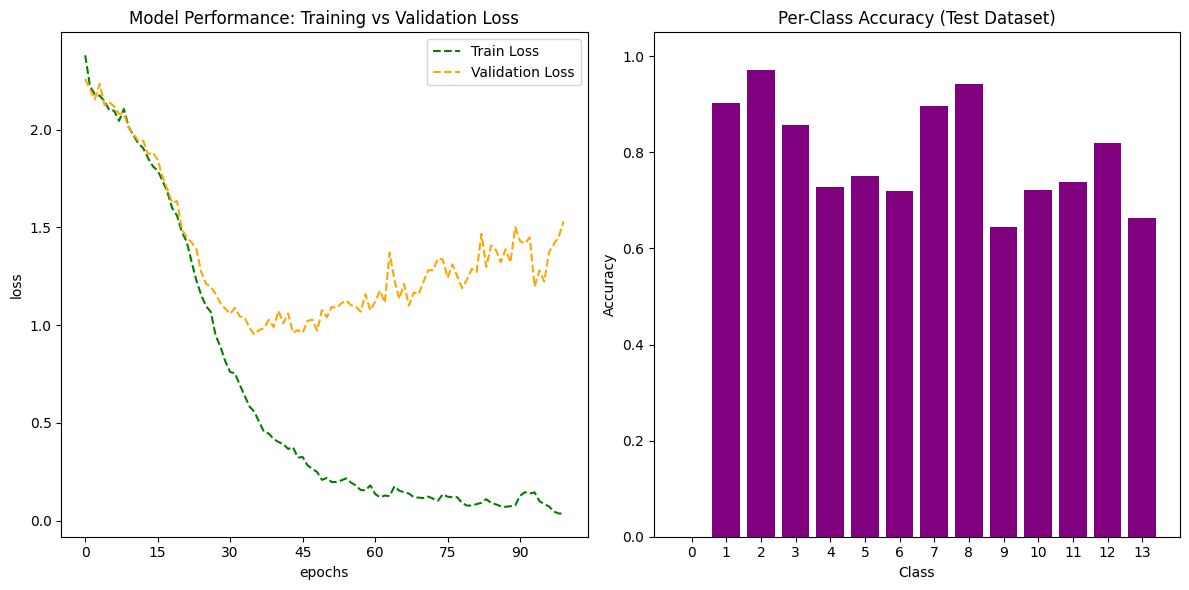

In [32]:
rlst2.perform_accuracy_gether()

In [33]:
print("Transformer 2")
trf2 = Transformer(input_size=seq_size)
rtrf2 = ImplementDLEv(fastafile=nc_file, batch_size=batch_size,num_workers=1, 
                 model = trf2, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=lr, num_epochs = num_epochs, seq_length = seq_size,
                 subset = 0,chkpoint=True, chkpath = "chkpoints/rtrf", random_rev_compl_transform_prob=random_rev_compl_transform_prob,
                 fastaFile2=nc_file2, fastaFile3=nc_file3)

rtrf2.print_settings()
rtrf2.run_train()

Transformer 2
************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 256
num_workers: 1
model: Transformer(
  (embedding): Linear(in_features=4, out_features=64, bias=True)
  (positional_encoding): PositionalEncoding()
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=Fa

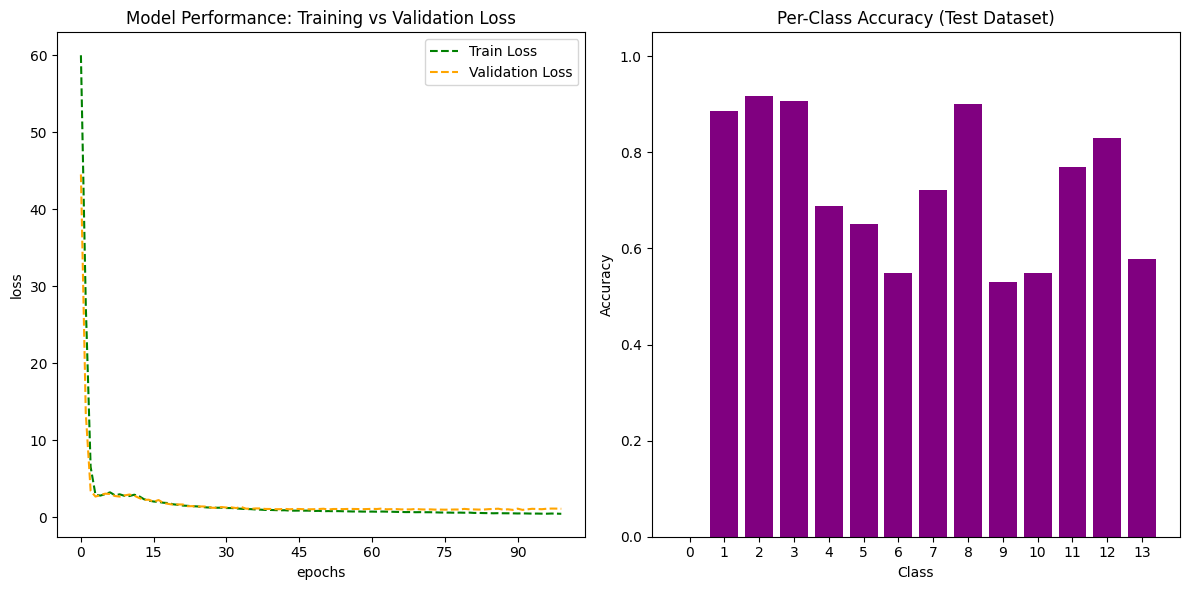

In [34]:
rtrf2.perform_accuracy_gether()

<h3>Chg Hyperparameters 3 </h3>

In [35]:
seq_size = 118
batch_size=64
num_epochs = 100
random_rev_compl_transform_prob = 0.5
lr=0.0001

In [36]:
print("Simple Linear Model (Logistic Regression) 3")
sl3 = SimpleLinear(input_size=seq_size*4)
rsl3 = ImplementDLEv(fastafile=nc_file, batch_size=batch_size,num_workers=1, 
                 model = sl3, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=lr, num_epochs = num_epochs, seq_length = seq_size,
                 subset = 0,chkpoint=True, chkpath = "chkpoints/rsl", random_rev_compl_transform_prob=random_rev_compl_transform_prob,
                 fastaFile2=nc_file2, fastaFile3=nc_file3)
                

rsl3.print_settings()
rsl3.run_train()

Simple Linear Model (Logistic Regression) 3
************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 64
num_workers: 1
model: SimpleLinear(
  (fc): Linear(in_features=472, out_features=14, bias=True)
)
device: cpu
train_ratio: 0.7
val_ratio: 0.15
test_ratio: 0.15
lr: 0.0001
num_epochs: 100
seq_length: 118
subset: 0
chkpoint: True
chkpath: chkpoints/rsl
random_rev_compl_transform_prob: 0.5
fastaFile2: datafiles/dataset_Rfam_validated_2400_12classes.fasta
fastaFile3: datafiles/dataset_Rfam_validated_2600_13classes.fasta


Run Information
---------------
Total sample length: 11320
Epoch 1/100, Loss: 2.5812, Avg Batch Time: 0.0023s
Validation Loss: 2.5042, Validation Accuracy: 0.1690
Validation Class Accuracy:  [0, 0.324, 0.178, 0.336, 0.023, 0.135, 0.098, 0.328, 0.291, 0.157, 0.108, 0.028, 0.057, 0.071]
Epoch 2/100, Loss: 2.4122, Avg 

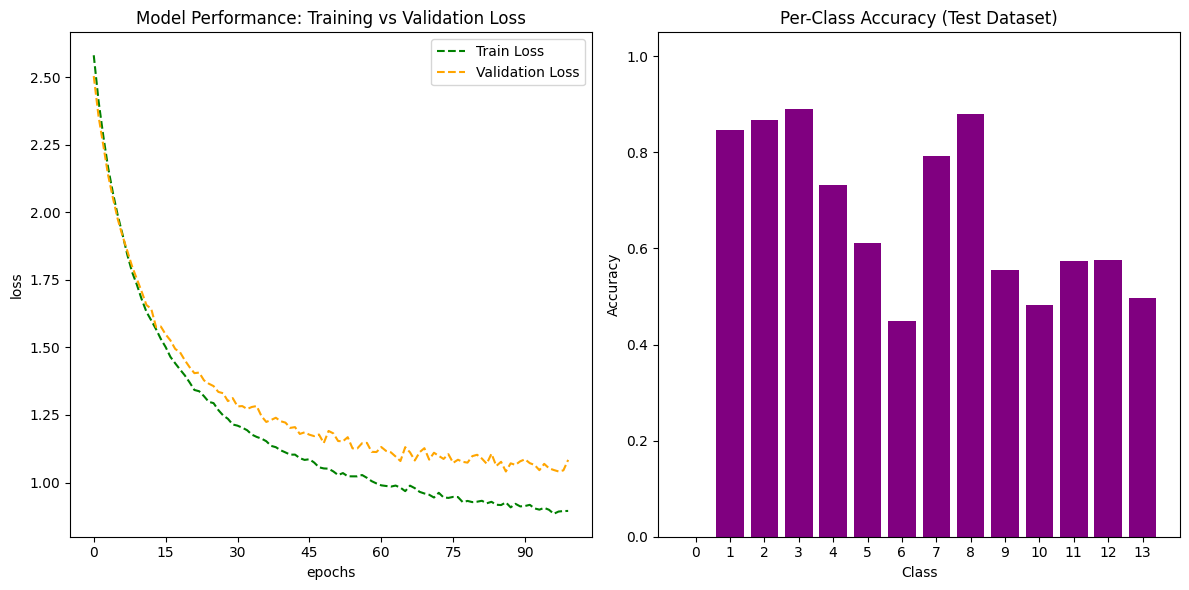

In [37]:
rsl3.perform_accuracy_gether()

In [38]:
print("Simple MLP 3")
sm3 = SimpleMLP(input_size=seq_size*4)
rsm3 = ImplementDLEv(fastafile=nc_file, batch_size=batch_size,num_workers=1, 
                 model = sm3, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=lr, num_epochs = num_epochs, seq_length = seq_size,
                 subset = 0,chkpoint=True, chkpath = "chkpoints/rsm", random_rev_compl_transform_prob=random_rev_compl_transform_prob,
                 fastaFile2=nc_file2, fastaFile3=nc_file3)
                

rsm3.print_settings()
rsm3.run_train()


Simple MLP 3
************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 64
num_workers: 1
model: SimpleMLP(
  (fc1): Linear(in_features=472, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=14, bias=True)
)
device: cpu
train_ratio: 0.7
val_ratio: 0.15
test_ratio: 0.15
lr: 0.0001
num_epochs: 100
seq_length: 118
subset: 0
chkpoint: True
chkpath: chkpoints/rsm
random_rev_compl_transform_prob: 0.5
fastaFile2: datafiles/dataset_Rfam_validated_2400_12classes.fasta
fastaFile3: datafiles/dataset_Rfam_validated_2600_13classes.fasta


Run Information
---------------
Total sample length: 11320
Epoch 1/100, Loss: 2.5678, Avg Batch Time: 0.0041s
Validation Loss: 2.4750, Validation Accuracy: 0.3345
Validation Class Accuracy:  [0, 0.415, 0.427, 0.557, 0.171, 0.223, 0.267, 0.446, 0.645, 0.385, 0.235, 0.0, 0

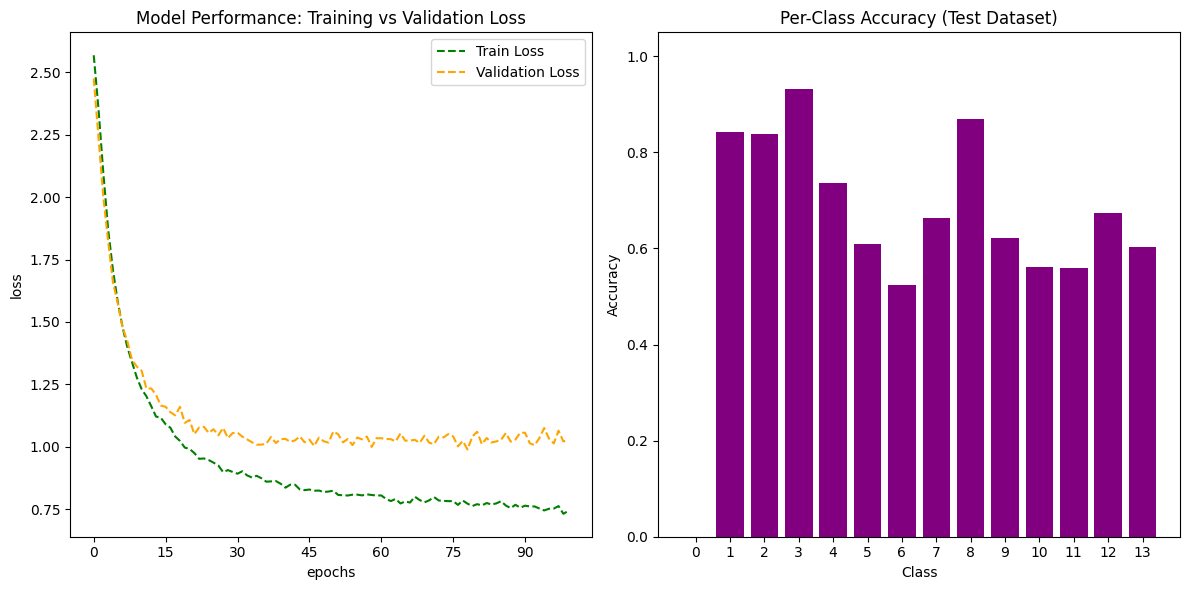

In [39]:
rsm3.perform_accuracy_gether()

In [40]:
print("Combined CNN 3")
cCNN13 = CombineCNN1(input_size=seq_size)
rcCNN13=ImplementDLEv(fastafile=nc_file, batch_size=batch_size,num_workers=1, 
                 model = cCNN13, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=lr, num_epochs = num_epochs, seq_length = seq_size,
                 subset = 0,chkpoint=True, chkpath = "chkpoints/rccnn1", random_rev_compl_transform_prob=random_rev_compl_transform_prob,
                 fastaFile2=nc_file2, fastaFile3=nc_file3)

rcCNN13.print_settings()
rcCNN13.run_train()


Combined CNN 3
************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 64
num_workers: 1
model: CombineCNN1(
  (conv1): Conv2d(4, 64, kernel_size=(7, 1), stride=(1, 1), padding=(3, 0))
  (conv2): Conv2d(64, 128, kernel_size=(7, 1), stride=(1, 1), padding=(3, 0))
  (conv3): Conv2d(128, 256, kernel_size=(7, 1), stride=(1, 1), padding=(3, 0))
  (pool): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3584, out_features=512, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=14, bias=True)
  (relu): ReLU()
)
device: cpu
train_ratio: 0.7
val_ratio: 0.15
test_ratio: 0.15
lr: 0.0001
num_epochs: 100
seq_length: 118
subset: 0
chkpoint: True
chkpath: chkpoints/rccnn1
random_rev_compl_transform_prob: 0.5
fastaFile2: datafiles/data

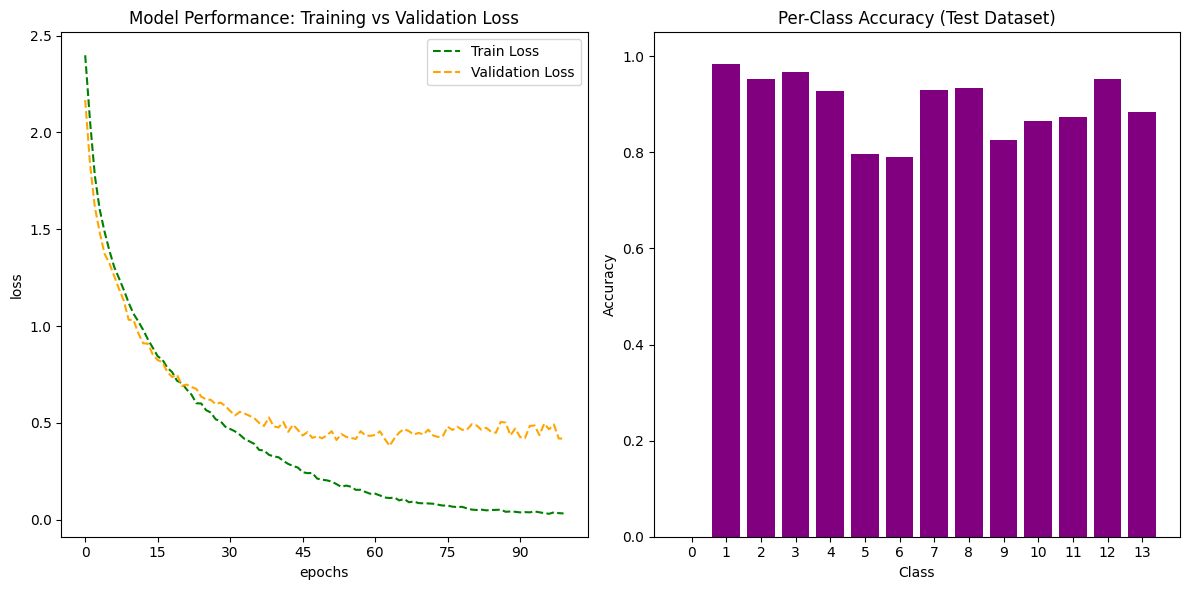

In [41]:
rcCNN13.perform_accuracy_gether()

In [42]:
print("LSTM 3")
lst3 = RnnLSTM(input_size=4)
rlst3 = ImplementDLEv(fastafile=nc_file, batch_size=batch_size,num_workers=1, 
                 model = lst3, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=lr, num_epochs = num_epochs, seq_length = seq_size,
                 subset = 0,chkpoint=True, chkpath = "chkpoints/rlst", random_rev_compl_transform_prob=random_rev_compl_transform_prob,
                 fastaFile2=nc_file2, fastaFile3=nc_file3)

rlst3.print_settings()
rlst3.run_train()


LSTM 3
************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 64
num_workers: 1
model: RnnLSTM(
  (lstm): LSTM(4, 128, batch_first=True)
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=256, out_features=14, bias=True)
)
device: cpu
train_ratio: 0.7
val_ratio: 0.15
test_ratio: 0.15
lr: 0.0001
num_epochs: 100
seq_length: 118
subset: 0
chkpoint: True
chkpath: chkpoints/rlst
random_rev_compl_transform_prob: 0.5
fastaFile2: datafiles/dataset_Rfam_validated_2400_12classes.fasta
fastaFile3: datafiles/dataset_Rfam_validated_2600_13classes.fasta


Run Information
---------------
Total sample length: 11320
Epoch 1/100, Loss: 2.6267, Avg Batch Time: 0.1719s
Validation Loss: 2.6080, Validation Accuracy: 0.1343
Validation Class Accuracy:  [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.754, 1.0, 0.0, 

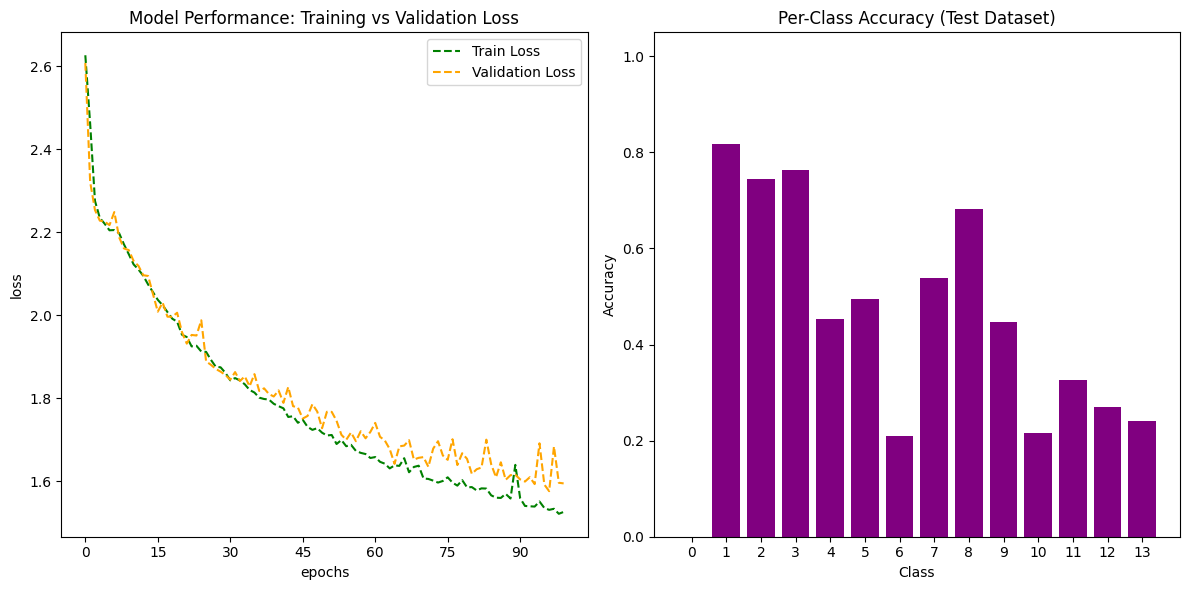

In [43]:
rlst3.perform_accuracy_gether()

In [44]:
print("Transformer 3")
trf3 = Transformer(input_size=seq_size)
rtrf3 = ImplementDLEv(fastafile=nc_file, batch_size=batch_size,num_workers=1, 
                 model = trf3, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=lr, num_epochs = num_epochs, seq_length = seq_size,
                 subset = 0,chkpoint=True, chkpath = "chkpoints/rtrf", random_rev_compl_transform_prob=random_rev_compl_transform_prob,
                 fastaFile2=nc_file2, fastaFile3=nc_file3)

rtrf3.print_settings()
rtrf3.run_train()

Transformer 3
************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 64
num_workers: 1
model: Transformer(
  (embedding): Linear(in_features=4, out_features=64, bias=True)
  (positional_encoding): PositionalEncoding()
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=Fal

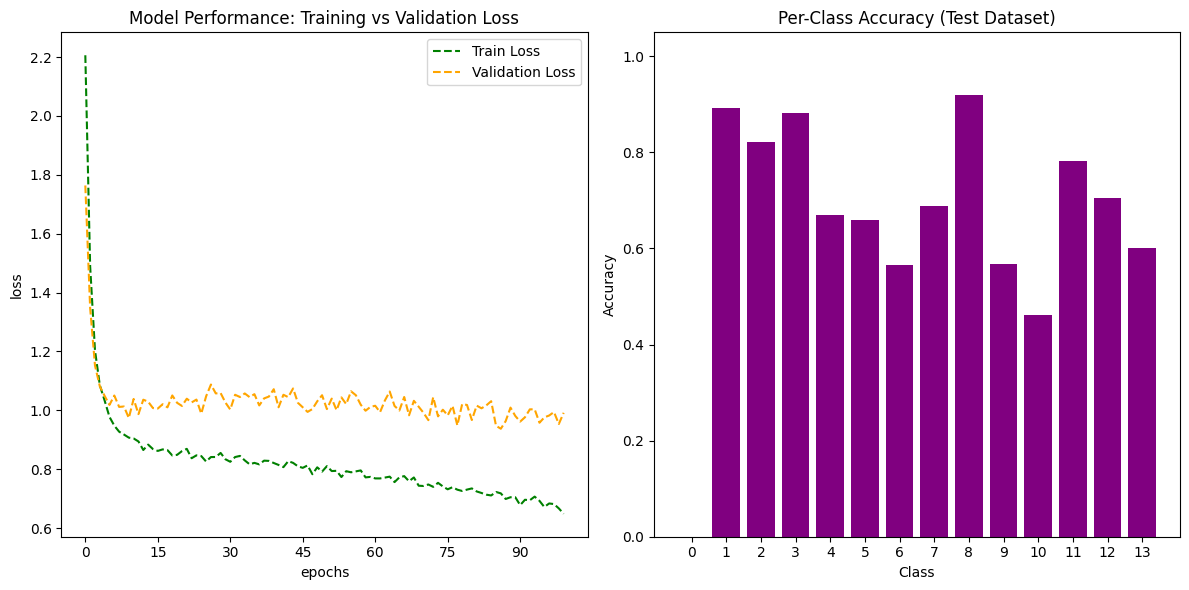

In [45]:
rtrf3.perform_accuracy_gether()

---

## Model Performance Comparison Across Architectures and Hyperparameters ##

| Seq_size | Batch_size | Learning Rate (lr) | Model         | Train Loss | Val Loss |
|----------|------------|---------------------|----------------|------------|----------|
| 110      | 128        | 0.001               | Simple Linear  | 0.8176     | 1.1205   |
|          |            |                     | Simple MLP     | 0.0196     | 1.0783   |
|          |            |                     | Combined CNN   | 0.0062     | 0.6938   |
|          |            |                     | LSTM           | 1.7546     | 1.7745   |
|          |            |                     | Transformer    | 0.0724     | 1.5447   |
| 120      | 256        | 0.01                | Simple Linear  | 0.7888     | 1.1136   |
|          |            |                     | Simple MLP     | 0.0003     | 1.5731   |
|          |            |                     | Combined CNN   | 0.3557     | 1.0112   |
|          |            |                     | LSTM           | 0.0343     | 1.5312   |
|          |            |                     | Transformer    | 0.4471     | 1.0991   |
| 118      | 64         | 0.0001              | Simple Linear  | 0.8949     | 1.0837   |
|          |            |                     | Simple MLP     | 0.7432     | 1.0265   |
|          |            |                     | Combined CNN   | 0.0325     | 0.4188   |
|          |            |                     | LSTM           | 1.5261     | 1.5948   |
|          |            |                     | Transformer    | 0.6484     | 0.9916   |


## Accuracy per Model Across ncRNA Classes ##

Each column from 1 to 13 corresponds to a specific **ncRNA class**.  
The values represent the **classification accuracy** (ranging from 0 to 1) for each class, evaluated using different deep learning models and training hyperparameters.


---
#### <center> Configuration: Seq_size = 110, batch_size = 128, lr = 0.001</center>

| Model         | Global | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9     | 10    | 11    | 12    | 13    |
|---------------|--------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Simple Linear | 0.6727 | 0.829 | 0.864 | 0.896 | 0.641 | 0.640 | 0.468 | 0.733 | 0.857 | 0.535 | 0.468 | 0.537 | 0.770 | 0.542 |
| Simple MLP    | 0.7834 | 0.932 | 0.886 | 0.927 | 0.808 | 0.718 | 0.585 | 0.846 | 0.920 | 0.646 | 0.682 | 0.743 | 0.785 | 0.673 |
| Combined CNN  | 0.9070 | 0.978 | 0.975 | 0.967 | 0.868 | 0.922 | 0.848 | 0.896 | 0.936 | 0.850 | 0.843 | 0.905 | 0.952 | 0.840 |
| LSTM          | 0.4320 | 0.691 | 0.761 | 0.746 | 0.467 | 0.386 | 0.141 | 0.423 | 0.585 | 0.312 | 0.238 | 0.280 | 0.319 | 0.206 |
| Transformer   | 0.8028 | 0.937 | 0.893 | 0.874 | 0.816 | 0.789 | 0.651 | 0.722 | 0.939 | 0.667 | 0.697 | 0.838 | 0.841 | 0.738 |

---

#### <center> Configuration: Seq_size = 120, batch_size = 256, lr = 0.01</center>

| Model         | Global | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9     | 10    | 11    | 12    | 13    |
|---------------|--------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Simple Linear | 0.6733 | 0.808 | 0.871 | 0.894 | 0.748 | 0.724 | 0.392 | 0.758 | 0.885 | 0.470 | 0.522 | 0.563 | 0.642 | 0.429 |
| Simple MLP    | 0.8081 | 0.859 | 0.896 | 0.921 | 0.805 | 0.672 | 0.649 | 0.852 | 0.895 | 0.770 | 0.775 | 0.863 | 0.847 | 0.682 |
| Combined CNN  | 0.7987 | 0.938 | 0.959 | 0.909 | 0.769 | 0.688 | 0.656 | 0.835 | 0.959 | 0.625 | 0.756 | 0.755 | 0.820 | 0.584 |
| LSTM          | 0.7987 | 0.902 | 0.971 | 0.858 | 0.729 | 0.750 | 0.719 | 0.896 | 0.943 | 0.645 | 0.722 | 0.738 | 0.820 | 0.664 |
| Transformer   | 0.7304 | 0.887 | 0.918 | 0.907 | 0.688 | 0.652 | 0.549 | 0.721 | 0.900 | 0.530 | 0.549 | 0.770 | 0.831 | 0.578 |

---

#### <center> Configuration: Seq_size = 118, batch_size = 64, lr = 0.0001</center>

| Model         | Global | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9     | 10    | 11    | 12    | 13    |
|---------------|--------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Simple Linear | 0.6716 | 0.847 | 0.868 | 0.891 | 0.732 | 0.612 | 0.450 | 0.793 | 0.881 | 0.556 | 0.482 | 0.575 | 0.577 | 0.496 |
| Simple MLP    | 0.7034 | 0.842 | 0.839 | 0.933 | 0.736 | 0.610 | 0.525 | 0.664 | 0.870 | 0.621 | 0.562 | 0.560 | 0.673 | 0.604 |
| Combined CNN  | 0.8988 | 0.984 | 0.952 | 0.968 | 0.927 | 0.797 | 0.791 | 0.929 | 0.934 | 0.825 | 0.866 | 0.874 | 0.952 | 0.885 |
| LSTM          | 0.4897 | 0.818 | 0.744 | 0.764 | 0.454 | 0.494 | 0.210 | 0.539 | 0.682 | 0.446 | 0.215 | 0.327 | 0.270 | 0.241 |
| Transformer   | 0.7128 | 0.893 | 0.822 | 0.882 | 0.669 | 0.659 | 0.566 | 0.688 | 0.919 | 0.568 | 0.462 | 0.783 | 0.706 | 0.600 |
---

## **Discussion and Conclusions**



The main objective of this academic work was to design, implement, and evaluate five deep learning models introduced during the course, in order to classify 13 classes of non-coding RNA (ncRNA) based on their primary sequence. The goal was to compare their performance and explore which architectures are better suited for identifying class-specific sequence patterns.

After preprocessing and organizing the data, an exploratory analysis showed that most ncRNA classes contained over 800 sequences, with the exception of IRES and scaRNA, which had slightly fewer (between 600 and 800). The total dataset consisted of 11,320 sequences, with average lengths ranging from 100 to 130 nucleotides.

To assess whether system works well, I conducted an overfitting test using a Simple Linear model (logistic regression) trained on just 100 samples. As expected, the model quickly overfit the training data.

Subsequently, five models were evaluated across three sets of hyperparameters:

- **Simple Linear**
- **Simple MLP**
- **Combined CNN**
- **LSTM**
- **Transformer**

For each model, I generated plots of training and validation loss, class-specific accuracy charts, and detailed epoch-level logs. Two summary tables were created: one comparing overall model performance and another detailing per-class accuracy across models.

Among the models, the **Combined CNN** consistently delivered the best results. It achieved the lowest validation loss (0.4188) using sequence length 118, batch size 64, and a learning rate of 0.0001. It also attained the highest global accuracy (0.9070) with a different hyperparameter configuration (110, 128, 0.001). These results suggest that local sequence motifs are critical features for ncRNA classification, which CNNs are particularly well-equipped to detect.

The highest per-class accuracies were observed for **Class 1 (5S_rRNA)** and **Class 2 (5.8S_rRNA)**, both ribosomal RNAs (rRNA). Their strong sequence conservation likely contributes to their high classification performance, reinforcing the notion that conserved structural elements are easier for models to learn.

Interestingly, the **Simple MLP** outperformed other models in one hyperparameter setting (120, 256, 0.01), even surpassing the CNN in that case. Conversely, the **LSTM** performed poorly under two configurations, particularly when using lower batch sizes and learning rates, suggesting it is more sensitive to hyperparameter tuning. The **Transformer** model showed promising results in one run but lacked consistency across configurations.

When compared to the original study by *Fiannaca et al. (2017)*—which used the same dataset and concluded with a CNN model achieving an accuracy of 0.8104—this project presents a notable improvement. The best model in this work achieved 0.8988 accuracy, representing nearly a 9% increase.

In conclusion, this study demonstrates that convolutional neural networks are particularly effective for classifying ncRNA sequences based on primary structure, especially for conserved classes like rRNA. Moreover, the performance improvements observed here highlight the value of careful model selection and hyperparameter tuning in tackling complex bioinformatics classification tasks.


## **References**

The material used in this project was primarily sourced from the course COMP6841 at Concordia University, including lab materials, tutorials, and lecture information, as well as programming code. This course was taught by Professor Micco Ravanelli during the winter term 2025.

[Biopython Documentation](https://biopython.org/)
Cock, P. J. A., Antao, T., Chang, J. T., Chapman, B. A., Cox, C. J., Dalke, A., ... & de Hoon, M. J. L. (2009). *Biopython: freely available Python tools for computational molecular biology*. Bioinformatics, 25(11), 1422-1423. https://doi.org/10.1093/bioinformatics/btp163

[PyTorch Documentation](https://pytorch.org/docs/stable/)
Paszke, A., Gross, S., Massa, F., Lerer, A., Bradbury, J., Chanan, G., ... & Chintala, S. (2019). *PyTorch: An imperative style, high-performance deep learning library*. Advances in Neural Information Processing Systems, 32, 8026–8037. https://pytorch.org

Fiannaca, A., La Rosa, M., La Paglia, L., Rizzo, R., & Urso, A. (2017). nRC: Non-coding RNA Classifier based on structural features. *BioData Mining, 10*(27). https://doi.org/10.1186/s13040-017-0148-2

